Single-process time: 1.41 sec
Multi-process time:  0.46 sec


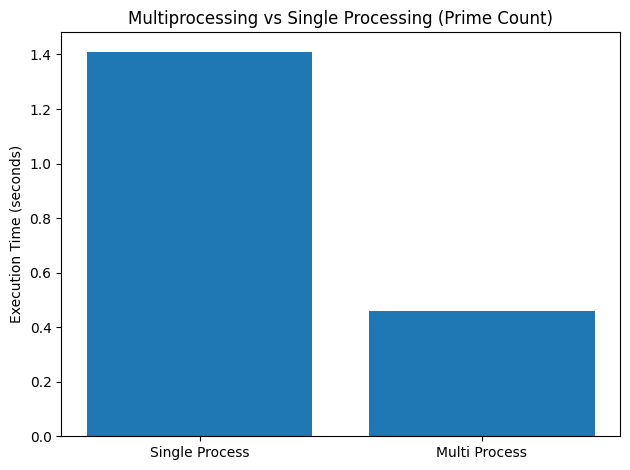

In [2]:
import time
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count

def is_prime(n):
    """n이 소수인지 여부를 판단하는 함수"""
    if n < 2:
        return False
    for i in range(2, int(n ** 0.5) + 1):
        if n % i == 0:
            return False
    return True


def count_primes_in_range(start, end):
    """start ~ end 범위 내 소수 개수 반환"""
    return sum(1 for i in range(start, end) if is_prime(i))


def run_sequential(numbers):
    """단일 프로세스로 소수 계산"""
    result = []
    for start, end in numbers:
        result.append(count_primes_in_range(start, end))
    return result


def run_parallel(numbers):
    """멀티프로세스로 소수 계산"""
    with Pool(processes=cpu_count()) as pool:
        result = pool.starmap(count_primes_in_range, numbers)
    return result


def main():
    # 실험용 범위: (0~100000), (100000~200000), ...
    ranges = [(i, i + 100000) for i in range(0, 1000000, 100000)]

    # 단일 프로세스 실행 시간 측정
    start_time = time.perf_counter()
    seq_result = run_sequential(ranges)
    seq_time = time.perf_counter() - start_time
    print(f"Single-process time: {seq_time:.2f} sec")

    # 멀티 프로세스 실행 시간 측정
    start_time = time.perf_counter()
    par_result = run_parallel(ranges)
    par_time = time.perf_counter() - start_time
    print(f"Multi-process time:  {par_time:.2f} sec")

    # 결과 시각화
    fig, ax = plt.subplots()
    ax.bar(['Single Process', 'Multi Process'], [seq_time, par_time])
    ax.set_ylabel('Execution Time (seconds)')
    ax.set_title('Multiprocessing vs Single Processing (Prime Count)')
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    main()